# COGS 108 - Final Project

## Names
- Andres Meza
- Jiaquan Chen
- Guanzhang Chen 
- Jie Guo 
- David Huergo

## Group Memebers Ids
- A12786727
- A53245316
- A13783495
- A53244211
- A14734959

## Part1 - Introduction & Background

### Overview
Online-shopping is one of the most popular shopping approaches in today’s internet ecosystem. The project goal is to analyze and predict users’ shopping behaviors based on the data collected from the "Instacart" app. In this project, we first introduce the background of this topic. Then we visualized and analyze the dataset. After that, we apply two different two different machine learning models for each feature present in the dataset (perceptron and random forest) in order to predict users’ reorder behaviors. Finally, we compare the performance of the models associated with each feature. The prediction results are mainly evaluated by Jaccard similarity coefficient (accuracy) score. According to our results, the best predictor for a given user's reorder behavior is the day of the week (dow feature) on which an order is placed which had an accuracy score of 95.8411%.

### Research Question
In profiling the purchasing behavior of Instacart users, the focus of this analysis project is to determine the best method of predicting future purchases using the factors of previous purchases for a given Instacart user. To this end, the following three questions are of interest:
1. What is the degree to which the different factors of a user’s previous Instacart purchases accurately predict the content of future Instacart purchases?
2. Which factor or group of factors is the strongest predictor of future purchasing behavior?
3. Which factor or group of factors is the weakest predictor of future purchasing behavior?

## Background and Prior Work
Internet shopping has become very popular in recent years. Today, we have a lot of applications and websites where we can make grocery orders and have them delivered to our door. Instacart is a mobile application which allows the registered user to make orders using their smart device. After an order is placed, a personal shopper will review the order, purchase the items for you and deliver it to your home. Using the increased number of orders made on the mobile platform, we can analyze how likely and frequently a user will reorder the items they purchase and give them recommendations to make the shopping experience more delightful. In addition, we can utilize the data to draw some conclusions on the types of products customers will most likely buy and analyze their shopping behavior.
In our shopping experience, there are several factors that will influence our purchase choice. For example, if you decide to have soup salads for dinner and you want to order them on Instacart, you are more likely to purchase items belonging to the “prepared soup salads” aisle. Also, you are more likely to purchase items that you have purchased multiple times in the past. This kind of information led to our hypothesis above. The topic of this project is meaningful and important because we can use the information analyzed from the dataset to help both merchants and customers. On the one hand, the merchants can make better recommendations to their target customers and, as a result, make more profit. On the other hand, customers can have a more enjoyable and helpful shopping experience with precise prediction. Additionally, the profiling prediction method could be used alongside other datasets to help warn consenting customers of the negative health effects of their purchases.

The topic we chose is from the Kaggle competition (Instacart Market Basket Analysis) and there are some similar prior works. For example, we found one similar topic in the GitHub repositories from tstreamDOTh.
EDA and Market Basket Analysis are included in his work. Analysis similar to these are actually what we plan to do in order to help find the major factors that would influence customers’ purchase behaviors. Besides, we also plan to do some prediction tasks.

Reference:

1. https://github.com/tstreamDOTh/Instacart-Market-Basket-Analysis 
2. https://github.com/LaceyChen17/instacart-market-basket-analysis 
3. https://github.com/jpzhangvincent/InstacartKaggleCompetition

## Hypothesis
As a fresh groceries app, instcart would like to provide appropriate amount of each groceries that the market needs. Therefore, it is neccessary to make predictions about customers' potential purchase in the future based on finding relationship with reorder rate and other related factors. We believe that the optimal method of predicting the content of future purchases will involve combining the best performing individual predictors into a hybrid weighted predictor where weights are based on the individual prediction accuracy of each predictor. Given that there are many factors to consider for each purchase, we expect certain factors, such as whether or not this is a repeat order, to have a higher degree of prediction accuracy than other factors, such as the deparment of the products ordered. 

## Part 2 - Dataset(s)
The data we plan to use is from Instacart and can be downloaded from the following link:

https://www.instacart.com/datasets/grocery-shopping-2017

This dataset contains 5 data forms. The first form is an aisles form which contains aisles id and aisles name. The second form contains departments information(departments name, departments id). The Third form contains order information(order id, product id, add_to_cart_order, reordered), in which 'reordered' indicates that the customer has a previous order that contains the product. The fourth form contains orders information(order id, user id, eval set, order number, order dow, order_hour_of_day, days_since_prior_order ), in which eval set tells which set (prior, train, test) an order belongs and order dow is the day of the week. The fifth form contains product information(product id, product name, aisle id, department id). The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users, so the size is sufficient enough for our goal. We will explore the data in each form to show the result of data analysis using images. Then we will do the prediction task, in which we will predict the next order of some users. Since there is no test set, we will split the original order set into two parts, one for training and the other one for testing usage.

## Part 3 - Data Analysis 
The main tasks of this project are exploring the data and making predictions. In this part, we will explore and visualize the data. The dataset provide tables that include:

### 3.1 - Data Cleaning / Pre-processing

#### chart cover from 2017 to 2018 <br/>

- order_dow = order on which day of week <br/> 
- order_hour_of_day = order at what time of the day <br/> 
- days_since_prior_order = how long since last order <br/> 
- add_to_cart_order = the order to add to cart <br/> 
- reordered = how many times reordered <br/> 
- eval_set = which set an order belongs to <br/> 
- order_number = order how many products <br/> 

In [2]:
import pred_lib as prd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style("dark")
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

#### Dataset Directories

In [3]:
dataset_dir = "./dataset/"
order_products_train_df = pd.read_csv(dataset_dir + "order_products__train.csv") # For training
order_products_prior_df = pd.read_csv(dataset_dir + "order_products__prior.csv") # The order information for all orders before last order
orders_df = pd.read_csv(dataset_dir +"orders.csv")
products_df = pd.read_csv(dataset_dir + "products.csv")
aisles_df = pd.read_csv(dataset_dir + "aisles.csv")
departments_df = pd.read_csv(dataset_dir + "departments.csv")

Although our datasets got from Kaggle are already quite clean where they have successfully followed the Safe Harbour Method and assigned much of the data into their respective categories, we still need to clean the dataframe. As we would like to predict the future roder based on data we collected, the majority of our data mainly focus on users, orders and products. In addition, we load all the csv files and check the listed columns to see which column should be merged and which should be modified. Be specific, for the days_since_prior_order colunm in the csv, we change the 'NAN' to '-1' as supposed to represent products that bought for the first time. Since we have different kinds of data in various of CSV forms, we create new dataframe by merging these forms. We merge the products(products_df), aisles(aisles_df) and departments(departments_df) information into order_products_prior_df to combine as one dataframe for later analysis usage.

For the prediction part, we do the prediction based on each user and his or her orders. We design data cleaning functions for each user to build new dataframe for prediction purpose. For each user_id, we find all the orders ordered by this user. We also get all the products based on user_id and build a  product dataframe for each user. df_user_prod is one of the dataframe we built, in which columns are product_id, product_name, aisle_id and department_id.

In [67]:
order_products_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 10 columns):
order_id                 int64
product_id               int64
add_to_cart_order        int64
reordered                int64
product_name             object
aisle_id                 int64
department_id            int64
aisle                    object
department               object
add_to_cart_order_mod    int64
dtypes: int64(7), object(3)
memory usage: 2.7+ GB


In [5]:
# add_to_cart_order: The order that the user add certain product to the basket
order_products_train_df[:3]

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


In [6]:
# order_dow: The order made on the day of the week
# order_hour_of_day: The order made on the hour of the day
# days_since_prior_order: How long between the current order and the previous order made through instacart

orders_df.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [7]:
# product_name: The name of the product
products_df.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [8]:
# add_to_cart_order: The order for certain product added to the final basket
#                   (from 1 to total number of items purchased in one order) 
# reordered: Wheather the user reorder it or not (True(1) for Yes, False(0) for No)
#            For prediction tasks, this is the field that needed to be determined

order_products_prior_df.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


In [9]:
# aisle: The aisle name corresponding to the aisle id
aisles_df.head(3)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars


In [10]:
# department: The department name corresponding to the department id
departments_df.head(3)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery


### 3.2 - Data Visualization 

#### The user order frequency distribution on each day of week

In this graph, we use the bar graph to show the frequency of order by week day. We can tell that majority of the orders are made in between Monday and Tuesday. And there is no obvious different on the frequency between weekdays and weekends. Possible reason can be that people realize they need something during weekends at home and ordered through instcart on the start of next week

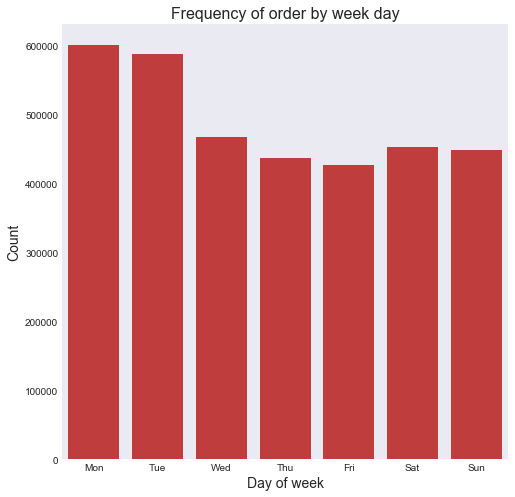

In [11]:
plt.figure(figsize=(8, 8))
sns.countplot(x="order_dow", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Day of week', fontsize=14)
plt.xticks(rotation='horizontal')
plt.title("Frequency of order by week day", fontsize=16)
scale_ls = range(7)
index_ls = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.xticks(scale_ls,index_ls) 
plt.show()

#### The user order frequency distribution on each hour of day

In this graph,we use bar graph to show the frequency of order by hour of day. We can tell that majority of the orders are made between 10 am to 4 pm of the day and least orders are made in the early morning or at late night. Since the app is supposed to send as little as one hour to send fresh ingredients, most deliveries are available during day time, especially from 8:00-19:00.

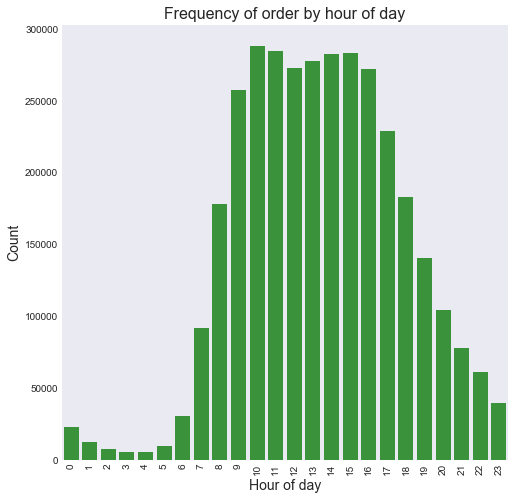

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[2])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Hour of day', fontsize=14)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=16)
plt.show()

#### Heatmap for frequency of Day of week Vs. Hour of day
We use heapmap to demonstrate frequency that user are most likely to make purchase during hours in a week. From the heatmap, it is obvious that most of users make purchase during the noon on Monday and Tuesday. The lighter the color, the more people make purchases during that period of time.

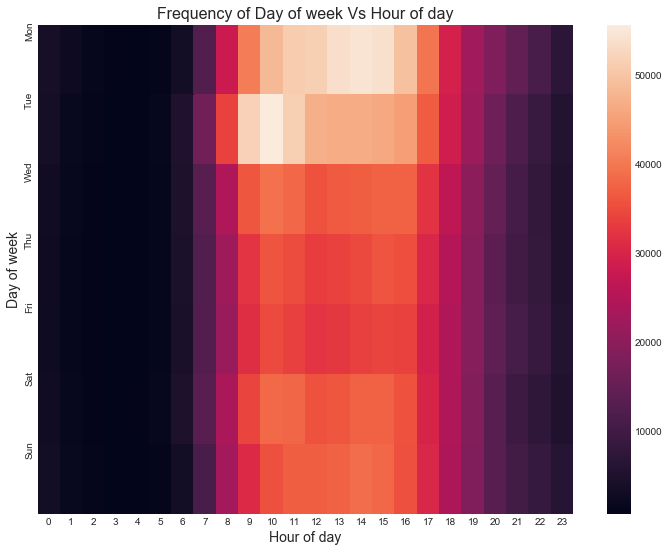

In [13]:
heatmap_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
heatmap_df = heatmap_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,9))
sns.heatmap(heatmap_df)
plt.title("Frequency of Day of week Vs Hour of day", fontsize=16)
plt.ylabel('Day of week', fontsize=14)
plt.xlabel('Hour of day', fontsize=14)
scale_ls = range(7)
index_ls = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.yticks(scale_ls,index_ls) 
plt.show()

#### The frequency distribution for days since last order

The bar graph demonstrated the users' shopping habit using instacart by providing the frequency distribution for days since last order. It does make sense that the most people shop through the instacart app approximately every 7 days or a month period. As we can see, there are two peaks on the graphs and they represent two different kinds of groceries. One type can be fresh ingredients that we have to buy frequently like vegetables. The other type can be long-time groceries like seasonings or napkins. 

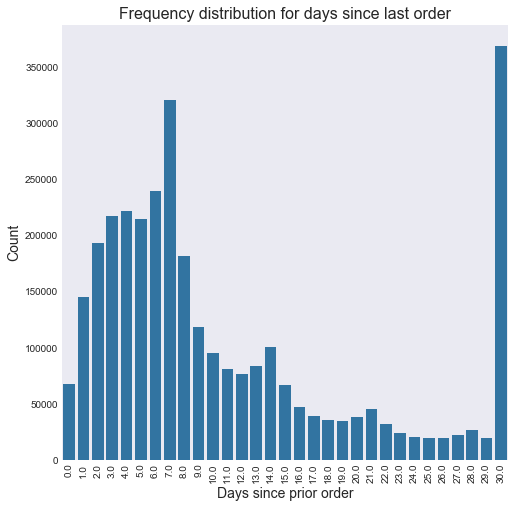

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Days since prior order', fontsize=14)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution for days since last order", fontsize=16)
plt.show()

Merge the products(products_df), aisles(aisles_df) and departments(departments_df) information into order_products_prior_df to combine as one dataframe

In [15]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


#### The top-20 most ordered products

By visually inspection, most of products are fruits and the organic food take the majority of the top-20 most favored products.

In [16]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs.sort_values(by=['frequency_count'], ascending=False)

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


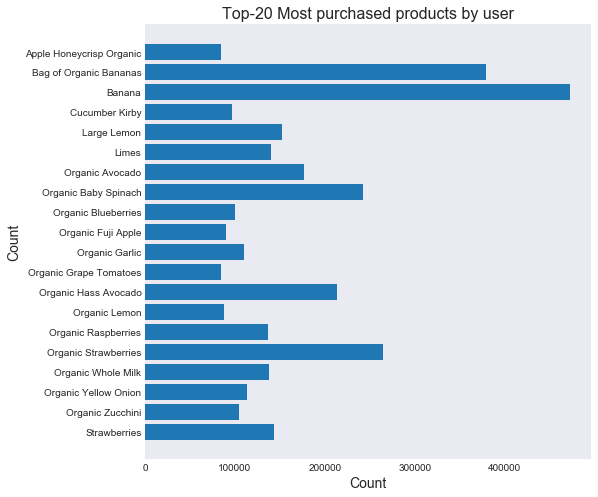

In [17]:
plt.figure(figsize=(8,8))
plt.barh(cnt_srs['product_name'], cnt_srs['frequency_count'])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.title("Top-20 Most purchased products by user", fontsize=16)
plt.gca().invert_yaxis()
plt.show()



#### Distribution of Aisles 


In this graph, we use pie graph to show the distribution of aisles. According to the graph, we see that large portion of aisles are fresh fruits and fresh vegetables. Their featured groceries are fresh and organic ingredients.

In [18]:
cnt_aisles = order_products_prior_df['aisle'].value_counts().head(20)

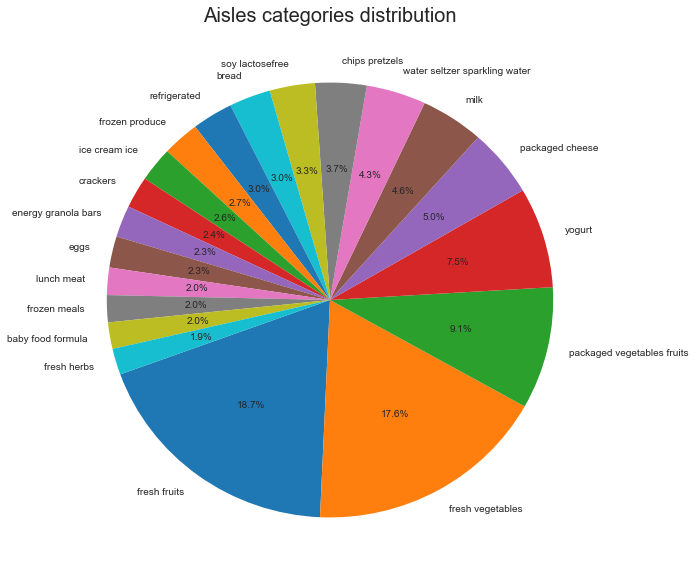

In [19]:
plt.figure(figsize=(10,10))
plt.pie(cnt_aisles.values, labels=cnt_aisles.index, 
        autopct='%1.1f%%', startangle=200)
plt.title("Aisles categories distribution", fontsize=20)
plt.show()

# plt.figure(figsize=(8,8))
# plt.barh(, , alpha=0.8, color=color[2])
# plt.ylabel('Aisles', fontsize=14)
# plt.title("Frequency distribution for ", fontsize=16)
# plt.xlabel('Number of Occurrences', fontsize=14)
# plt.xticks(rotation='vertical')
# plt.gca().invert_yaxis()
# plt.show()

#### Distributation of Department

In this graph, we use pie graph to show the distribution of departments. According to the graph, we see that large portion of departments are produce and dairy eggs. Their featured groceries are fresh and organic ingredients.

In [20]:
cnt_department = order_products_prior_df['department'].value_counts()
labels = (np.array(cnt_department.index))
sizes = (np.array((cnt_department / cnt_department.sum())*100))

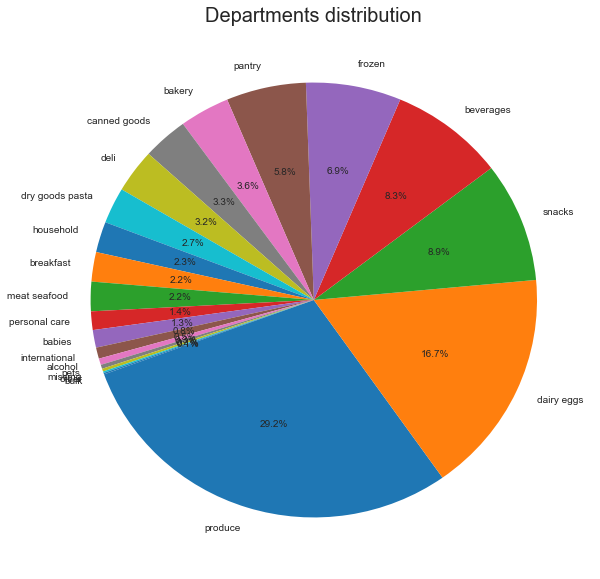

In [21]:
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=20)

plt.show()

#### Reorder Percentage for Department

Now, we have analyzed the dataset and the features it provided within the dataset. For latter prediction on whether the user will reorder the product or not, we need to consider and investigate on the reordering percentage at different department.

In [22]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

In [23]:
grouped_df.sort_values(by=['reordered'], ascending=False, inplace=True)
grouped_df.head()

,department,reordered
7,dairy eggs,0.669969
3,beverages,0.653460
19,produce,0.649913
2,bakery,0.628141
8,deli,0.607719


#### Department Reorder Ratio
In this graph, we use bar graph to show the reorder ratio of different departments. From the graph, we find that products from departments related with fresh groceries are more likely to be reordered compared with daily necessities departments.

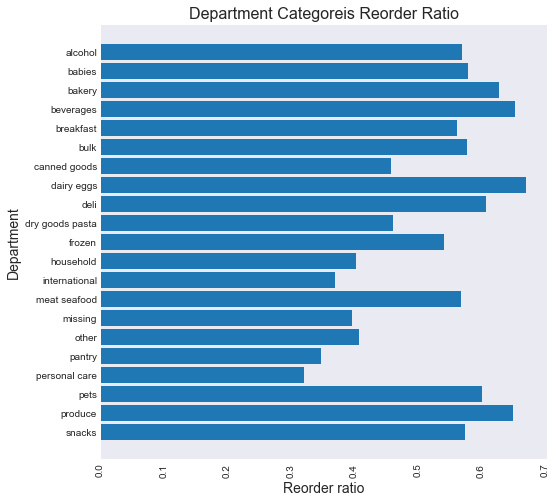

In [24]:
plt.figure(figsize=(8,8))
plt.barh(grouped_df['department'], grouped_df['reordered'])
plt.xlabel('Reorder ratio', fontsize=14)
plt.ylabel('Department', fontsize=14)
plt.title("Department Categoreis Reorder Ratio", fontsize=16)
plt.xticks(rotation='vertical')
plt.gca().invert_yaxis()
plt.show()

#### The relationship between the order for product added to cart and reorder ratio

From the trends showed in the figure below, we can tell that the earlier the user add the product into the cart, the more likely the customer will reorder this product. We can find a decreasing trend and the negative correlation between these two factors.

In [25]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].ix[order_products_prior_df["add_to_cart_order_mod"]>40] = 40
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


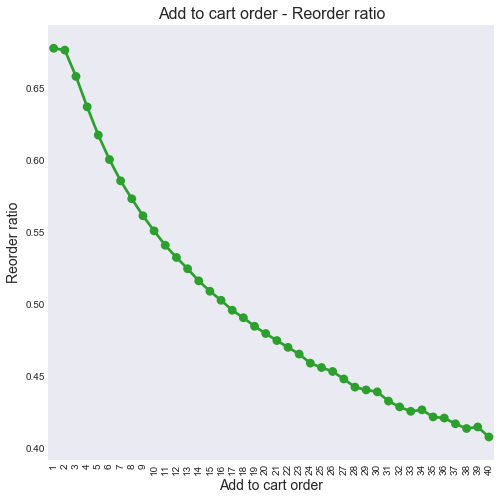

In [26]:
plt.figure(figsize=(8,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=14)
plt.xlabel('Add to cart order', fontsize=14)
plt.title("Add to cart order - Reorder ratio", fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

#### The relationship between Aisle and Reorder ratio
In the figure below, we can explore the relationship between the aisle and the reorder ratio. We can observe the fact that different aisles have diiferent reorder ration while "milk" aisle has the highest reorder ratio.

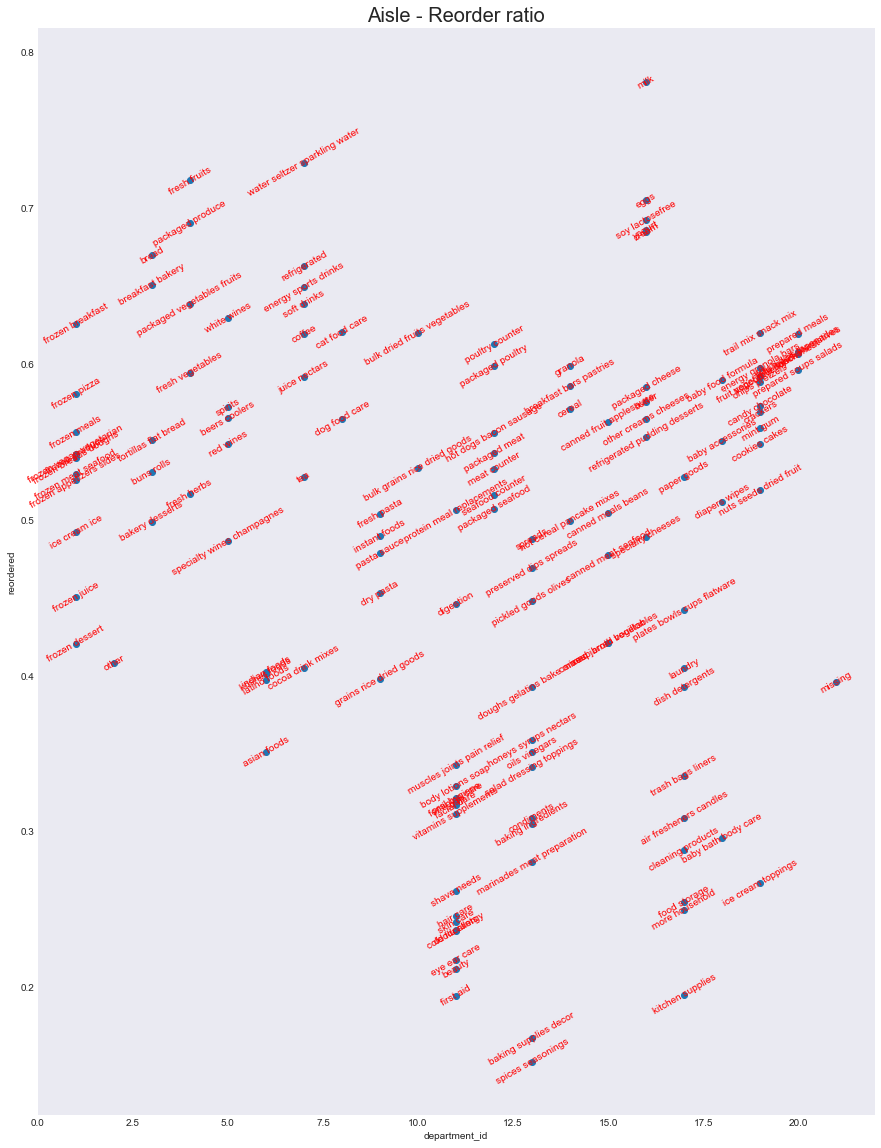

In [27]:
#Aisle - Reorder ratio:
group = order_products_prior_df.groupby(["department_id","aisle"])["reordered"].aggregate("mean").reset_index()
fig, a = plt.subplots(figsize=(15,20))
a.scatter(group.department_id.values,group.reordered.values)
for index,txt in enumerate(group.aisle.values):
    a.annotate(txt,(group.department_id.values[index],group.reordered.values[index]),
               rotation=30,ha ='center',va = 'center',color = 'red')
plt.xlabel('department_id')
plt.ylabel('reordered')
plt.title('Aisle - Reorder ratio',fontsize=20)
plt.show()

### 3.3 - Data Analysis / Results (Prediction)

The dataset has 303564 order entries in total and each corresponding to one product order. For each product, it contains the aisle name and the department name describing the categories within the Instacart database. The distributions for aisle and department categories are demonstrated above as a pie graph. The fresh fruits and fresh vegetables are most ordered products in the aisle categories. The produce department contributes approximately one-third of the order numbers among all the department categories.

From the calculation of statistics and visualization of the raw data provided by Instacart, we are able to find some interesting insights on people’s shopping habit and also provide some guidance on how to select appropriate features which will be discussed in detail later. For instance, we found that people are more likely to make a purchase on Monday and Tuesday of the week. There is also a peak for order numbers around noon at each day on average. From the heatmap for users’ order distribution, the period of time that people are most frequently shopping online is during Monday morning.

The column consisting the information on the days before last purchase for each user also provide some insights into users’ shopping habit. From frequency distribution for days before last order, we found the majority of the statistics fall on 7 days and 30 days. This pattern describes the people’s shopping habit and how frequently people make orders through the Instacart app.

Also, from the figure shown Top-20 most frequently purchased products, we found the majority of the products can be categorized as fruits and almost all the products in the top-20 are organic foods which indicate the user’s purchase preference on organic foods.

Lastly, we need to investigate on how frequently and what factors might affect customer to reorder products they previously bought. We use the reorder ratio as the criteria for determining how frequently the customer will reorder. Most of the reordered products are food-related products which demonstrated in Top-20 most frequently purchased products. We also identified a relationship between the order of product added to cart and the reorder ratio. The earlier the customer place the product in the cart, the higher possibility the customer will reorder this product in the future.

#### Generating Predictions Based on a Single Factor
There are seven factors that we are using as the basis for individual predictors of a given user's order behavior. 
1. product reorder             => `'ordered'`
2. order number in app for user         => `'num'`
3. order day of week           => `'dow'`
4. order hour of day           => `'hod'`
5. number of days since prior order => `'dspo'`
6. aisle of product      => `'aisle'`
7. department of product =>`'dep'`

To determine which of these factors is the best predictor, we create a machine learning model where the feature vector is comprised of a data from a single factor. The label associated with each feature vector is binary (-1 or 1) where -1 indicates that a particular product is not in a user's last purchase and 1 indicates that a particular product is in a user's last purchase.

Below, we build,train, and test a machine learning model for each user in a random sample of all users based on their previous order history. In order to streamline computation, we have created a prediction library which was used to distribute the computationally-heavy aspects of this process across multiple machines (see the pred_lib.py and FINALS_PRED.py for details).

```python
#Generate Predictions Based on Random Subset of Users
uids = prd.get_uids()

r_uids = [uids[ri] for ri in np.random.randint(len(uids),size=500)]

def build_pred_results(uids, feats):
    master = pd.DataFrame()
    uid_result = dict()
    for i in range(len(feats)):
        prd_result = list()
        for uid in uids:
            prd_result.append(prd.gen_user_prediction(uid,[feats[i]]))
        uid_result['Acc. with '+ feats[i]] = prd_result
    master = pd.DataFrame.from_dict(uid_result)
    return master

#Run prediction model 
pred_acc_res = build_pred_results(r_uids,['ordered','num','dow','dspo','hod','aisle','dep'])
pred_acc_res.to_csv('cpar')
```

In [68]:
pred_acc_res = pd.read_csv('cpar')
pred_acc_res = pred_acc_res.set_index('uids')
pred_acc_res

,Acc. with ordered,Acc. with num,Acc. with dow,Acc. with hod,Acc. with dspo,Acc. with aisle,Acc. with dep
uids,,,,,,,
183213,0.777778,1.000000,1.000000,0.888889,1.000000,0.000000,0.111111
51522,0.918919,0.918919,1.000000,0.918919,0.972973,0.945946,1.000000
106239,0.913043,0.956522,1.000000,0.695652,1.000000,0.956522,0.913043
140560,0.689655,1.000000,0.896552,1.000000,0.965517,0.758621,0.275862
100814,0.250000,0.750000,1.000000,1.000000,1.000000,0.750000,0.500000
154365,0.937500,0.875000,1.000000,0.812500,0.812500,0.916667,0.958333
94588,0.842105,0.912281,1.000000,0.929825,1.000000,0.947368,0.947368
56744,0.975610,0.804878,0.926829,0.975610,0.804878,1.000000,0.975610
142367,0.500000,1.000000,1.000000,1.000000,1.000000,0.285714,0.928571


#### Prediction Accuracy Results Based on a Single Factor

In [69]:
par_des = pred_acc_res.describe()
par_des

,Acc. with ordered,Acc. with num,Acc. with dow,Acc. with hod,Acc. with dspo,Acc. with aisle,Acc. with dep
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,0.766980,0.929268,0.958411,0.921556,0.934686,0.657704,0.683418
std,0.179938,0.113183,0.087929,0.125202,0.102644,0.280133,0.250347
min,0.027778,0.400000,0.333333,0.000000,0.333333,0.000000,0.000000
25%,0.677419,0.896552,0.947368,0.888889,0.900000,0.444444,0.533333
50%,0.813953,1.000000,1.000000,0.983051,1.000000,0.750000,0.750000
75%,0.891892,1.000000,1.000000,1.000000,1.000000,0.885714,0.882353
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


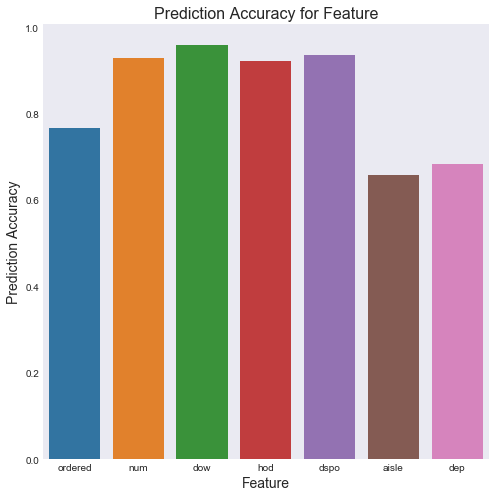

In [41]:
plt.figure(figsize=(8,8))
par_des1 = par_des.drop(par_des.index[[0,2,3,4,5,6,7]])
par_des1.columns = ['ordered','num','dow','hod','dspo','aisle','dep']
sns.barplot(data=par_des1)
plt.ylabel('Prediction Accuracy', fontsize=14)
plt.xlabel('Feature', fontsize=14)
plt.xticks(rotation='horizontal')
plt.title("Prediction Accuracy for Feature", fontsize=16)
plt.show()

1. What is the degree to which the different factors of a user’s previous Instacart purchases accurately predict the content of future Instacart purchases?
    * See diagram and table above
2. Which factor or group of factors is the strongest predictor of future purchasing behavior?
    * The single best performing factor is the day of the week factor. The best performing group of factors is the group which pertains to the details of when an order was placed.
3. Which factor or group of factors is the weakest predictor of future purchasing behavior?
    * The single worst performing factor is aisle of a given product. The worst performing group of factors is the group which pertains to the details of what product was ordered.

As stated at the beginning, the optimal solution would involve combining each of the individual predictors into a single hybrid weighted predictor. If all predictors where in agreement, then the predicted label would be the agreed label. In the case of disagreements, all predictors would place a weighted vote (greater accuracy = greater voting impact) and the majority label would be the predicted label. When using this approach, the mean prediction accuracy was 98.5141%.

These findings suggest that **when** is more informative than **what**. However, there may be other reasons which contribute to these results. Below, we explore one possiblity.

#### Standard Deviation of Features by User
```python
cpar_uids = list(pred_acc_res.index)

sd_feats = ['ordered','num','dow','hod','aisle','dep']
sds = pd.DataFrame()

for uid in cpar_uids:
    usd_dict = dict()
    #ordered
    usd_dict[sd_feats[0]] = prd.df_prior_by_uid(uid)['reordered'].std()
    #aisle
    sd_prods = prd.df_prods_by_uid(uid)
    usd_dict[sd_feats[4]] = sd_prods['aisle_id'].std()
    #dep
    usd_dict[sd_feats[5]] = sd_prods['department_id'].std()
    d = dict(prd.df_orders_by_uid(uid).describe().iloc[2])
    d.update(usd_dict)
    d['user_id'] = uid
    sds = sds.append(d, ignore_index=True)
sds = sds.set_index('user_id')
sds.index.name = 'uids'
sds
```

In [30]:
sds = pd.read_csv('445_sds_final')
sds = sds.set_index('user_id')
sds.index.name = 'uids'
sds.index = sds.index.map(int)

In [31]:
sds

,std ordered,std num,std dow,std hod,std dspo,std aisle,std dep
uids,,,,,,,
183213,0.504067,5.338539,1.782266,1.165966,10.099869,35.728607,6.594059
51522,0.484695,9.092121,1.796053,5.023172,7.789250,37.223405,5.293316
106239,0.493569,5.049752,1.322876,1.538716,11.340010,35.853445,4.737240
140560,0.493166,2.738613,2.147350,3.201562,4.949747,35.107999,6.521185
100814,0.510418,2.738613,1.500000,2.449490,9.934608,38.179242,6.454033
154365,0.483304,12.556539,2.229620,4.292851,6.648465,37.025112,6.474719
94588,0.445482,16.598193,2.021501,4.992915,2.644033,40.628957,6.078435
56744,0.500332,8.803408,2.318343,2.478644,7.167764,37.982068,6.615110
142367,0.481438,1.581139,1.224745,5.683309,6.806859,35.236471,6.412527


In [32]:
#General Results
#Number of Possible Values for Feature
analysis = pd.DataFrame()
analysis = analysis.append(pd.DataFrame([[2, -1,7,24,-1,134,21]],columns=['ordered','num','dow','hod','dspo','aisle','dep']))

#Standard Deviation of Raw User Data
sds_des = sds.describe()
sds_des = sds_des.drop(sds_des.index[[0,1,3,4,5,6,7]])
sds_des.columns = ['ordered','num','dow','hod','dspo','aisle','dep']
analysis = analysis.append(sds_des)

#Prediction Accuracy Results
par_des1 = par_des.drop(par_des.index[[0,2,3,4,5,6,7]])
par_des1.columns = ['ordered','num','dow','hod','dspo','aisle','dep']
analysis = analysis.append(par_des1)
analysis.index = ['Number of Possible Raw Values', 'StD of Raw User Value', 'Mean Pred. Acc.']
analysis

,ordered,num,dow,hod,dspo,aisle,dep
Number of Possible Raw Values,2.000000,-1.000000,7.000000,24.000000,-1.000000,134.000000,21.000000
StD of Raw User Value,0.070346,5.107596,0.537193,1.435881,2.976147,3.614274,0.790254
Mean Pred. Acc.,0.766980,0.929268,0.958411,0.921556,0.934686,0.657704,0.683418


In the table above we compare the prediction accuracy of each factor with its associated number of possible values and the standard deviation of those values. Since the machine learning models employed rely on linear seperability in order to classify a product as being ordered or not ordered, it is possible that certain factors experience more clustering than others which could explain why factors such as `ordered` didn't perform as well as expected. 

*A `-1` in the table above indicates a variable range of possibilities based on each user.*

## Part 4 - Ethics & Privacy
Although the datasets we will be using for our analysis do provide transactional user history, they do not provide us with the identity, location, gender, age, or any other personal piece of information. Besides the fact that they use Instacart, we know nothing about the users and, as such, they are anonymous. All profiling analysis is done with a user id which is created by the app itself and not known by the user which makes identifying any user virtually impossible. Additionally, the dataset was sourced from the Instacart developers themselves through a past-due Kaggle competition which is publicly available to anyone on the internet and is intended to be used for these sorts of purposes. In completing this project, we will not violate the terms of use of either Kaggle or Instacart.
One consideration for potential analytical bias is the user-agnostic pattern approach method. Given that we know what items should be related from a logical perspective, it may be the case that there is no strong statistical evidence to support implementing an expected pattern into our final prediction method.
From our dataset, one of the categories is about alcohol or specialty wine champagnes and given that we do not have the specific information redards users’ identity or ages, teenagers under 21 years old may have access to buy alcohol through the app. We acknowledge that dataset we use for this project may exist the phenomenon that teenagers buy alcohol illegally.

## Part 5 - Conclusion & Discussion


Based on the analysis, it was found that day of the week was the single best feature for prediction of next purchase with a mean prediction accuracy of 95%. Aisle was the worst feature for prediction of the next purchase, which is evidenced by a 65% mean prediction accuracy. The results also support the hypothesis that a weighted sum of all the features would best predict next purchase. These results are significant and actionable since instacart could use these predictions to buy precisely what stock they need, negotiate better prices for their stock knowing better the value of each item, vary the price of their products appropriately, and make many more informed business decisions. 

The weight associated with each factor can also be interpreted as their relative importance and can inform a merchant on what choices to make, such as: how to organize what items appear next to what items in a group, how many items to show on the screen, what items/groupings show during what days of the week and hours, how to organize stock in warehouse, choose what to sell, what to discontinue selling, what to advertise and when, and what to discount and when in order to cause more sales or secondary sales.

The analysis would be improved if there were more features such as month or location data. This would help reflect the change in consumer demand during different seasons and holidays.  Also, more models such as logistic regression could help provide another opportunity to improve and compare results.

Our results do support the hypothesis that certain factors would be better predictors than others and by knowing which were better an 'optimal' predictor could be created by combining , but this analysis is rudimentary because of the limitations on the number of features and models used in analysis. Further analysis is merited since it is established that future purchases can indeed be predicted with great accuracy, and having a more robust model to perform predictions and more features would only serve to improve accuracy.



